# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results

study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata,how='outer', on="Mouse ID")

# Display the data table for preview
merged_data.head(5) 
#study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
number=merged_data["Mouse ID"].nunique()
print(f"number of mice is ",number )


number of mice is  249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice= merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Convert to the desired format
output_array = np.array(duplicate_mouse_ids, dtype=object)

print(f"array({output_array}, dtype=object)")

array(['g989'], dtype=object)


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_mouse_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Create a clean DataFrame by dropping the duplicate mouse data
clean_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
# Display the clean DataFrame for preview
print(clean_data.head(5))

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  


In [7]:
# Checking the number of mice in the clean DataFrame.

num_unique_mice = clean_data['Mouse ID'].nunique()

print("Number of unique mice:", num_unique_mice)

Number of unique mice: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the clean data by drug regimen and calculate summary statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better readability
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics DataFrame
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) \
                                      .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Display the advanced summary statistics DataFrame
print(summary_stats_advanced)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

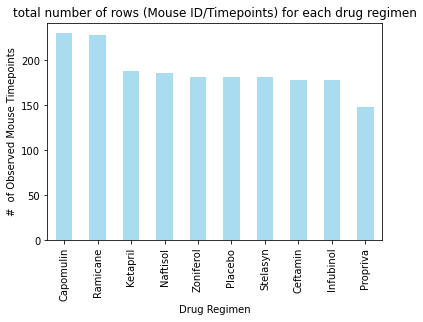

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group data by drug regimen and count the number of rows in each group
Drug_regimen_counts = clean_data['Drug Regimen'].value_counts()
# Create a bar plot using Pandas
Drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('#  of Observed Mouse Timepoints')
plt.title('total number of rows (Mouse ID/Timepoints) for each drug regimen')
# Rotate x-axis labels 
plt.xticks(rotation=90)
# show the  plot
plt.show()

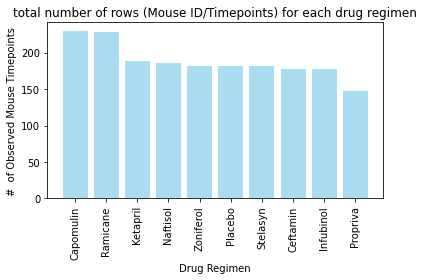

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group data by drug regimen and count the number of rows in each group
Drug_regimen_counts = clean_data['Drug Regimen'].value_counts()
# prepare data for plotting
drug_regimens = Drug_regimen_counts.index
counts = Drug_regimen_counts.values
# Create a bar plot using pyplot
plt.figure(figsize=(6, 4))
plt.bar(drug_regimens, counts, color='skyblue', alpha=0.7)
# plot x & y labels ,title and rotation for xticks
plt.xlabel('Drug Regimen')
plt.ylabel('#  of Observed Mouse Timepoints')
plt.title('total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

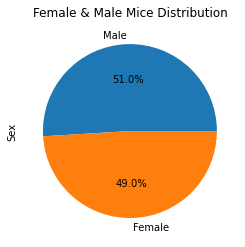

In [12]:
# Count the distribution of female and male mice
Sex_distribution = clean_data["Sex"].value_counts()
# Generate the pie chart using Pandas
Sex_distribution.plot(kind='pie', autopct='%1.1f%%', title='Female & Male Mice Distribution')


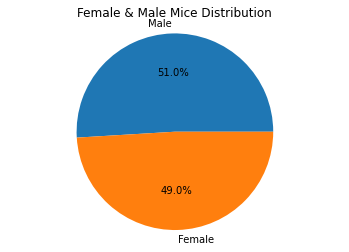

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Sex_distribution.values, labels=Sex_distribution.index, autopct='%1.1f%%')
plt.title('Female & Male Mice Distribution')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# List of treatment regimens 
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint_df, clean_data, on=["Mouse ID", "Timepoint"])
merged_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    volumes = merged_last_timepoint.loc[merged_last_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(volumes)
 
for i, treatment in enumerate(treatments):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
   # Determine outliers using upper and lower bounds
  
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


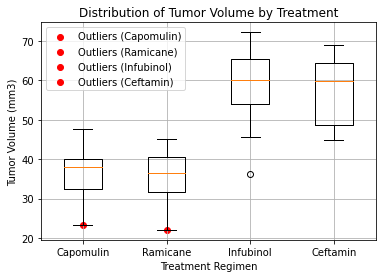

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a boxplot 
plt.figure(figsize=(6, 4))
ax = plt.subplot()
# Create a box plot using the axis
boxplot = ax.boxplot(tumor_volumes, labels=treatments)
# Add title and labels
ax.set_title("Distribution of Tumor Volume by Treatment")
ax.set_xlabel("Treatment Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

# Display the potential outliers (optional)
for i, treatment in enumerate(treatments):
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    ax.scatter([i + 1] * len(outliers), outliers, c='red', marker='o', label=f'Outliers ({treatment})')

# Add legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()


## Line and Scatter Plots

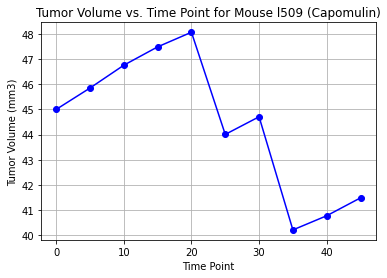

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
treatment = "Capomulin"

# Filter the data for the specific mouse  l509 and treatment Capomulin
mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == treatment)]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(6, 4))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b')

# Add title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()

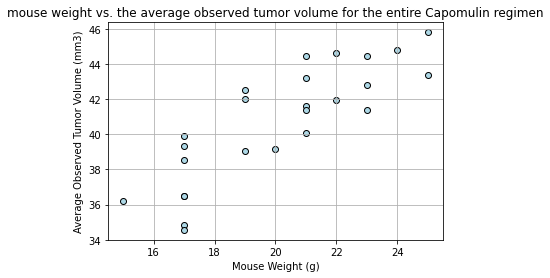

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate scatter plot
# Select a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

#average_tumor_volume = clean_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#mouse_weights = clean_data.groupby("Mouse ID")["Weight (g)"].unique()
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].unique()

plt.scatter(mouse_weights,average_tumor_volume,marker="o", facecolors="lightblue", edgecolors="black")
#plt.scatter(temp, sales, marker="o", facecolors="blue", edgecolors="black")

#plt.scatter(clean_data["Weight (g)"], summary_stats_advanced["Mean"], color="b", marker="o")
# Add title and labels
plt.title("mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

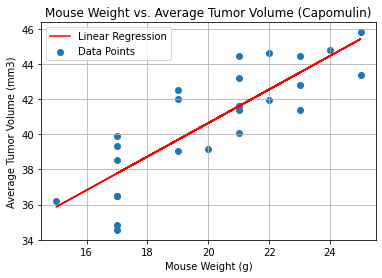

the Correlation coefficient is: 0.84
the fonction of Linear Regression is : y = 0.95x + 21.55


In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation coefficient
correlation = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

# Generate scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', label='Data Points')

# Plot linear regression line
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='red', label='Linear Regression')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

# Print correlation coefficient and linear regression parameters
print(f"the Correlation coefficient is: {correlation:.2f}")
print(f"the fonction of Linear Regression is : y = {slope:.2f}x + {intercept:.2f}")
